In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
# Load data train
train_data = pd.read_csv('data_train.csv')

In [3]:
#Data train preparation
X_train = train_data[['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida']]
y_train = train_data['kategori']

In [4]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [5]:
test_data = pd.read_csv('data_test.csv')

In [6]:
X_test = test_data[['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida']]
y_test = test_data['kategori']

In [7]:
y_test_encoded = label_encoder.transform(y_test)

In [8]:
# Define Models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    # Define Model SVM with specific kernel
    model = SVC(kernel=kernel, C=1000, gamma='scale')
    
    # Fit the model on training data
    model.fit(X_train, y_train_encoded)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy for each category
    categories = label_encoder.classes_
    accuracies = []
    print(f"\nKernel: {kernel.capitalize()}")
    for i, category in enumerate(categories):
        y_true_category = (y_test == category).astype(int)
        y_pred_category = (y_pred == i).astype(int)
        acc = accuracy_score(y_true_category, y_pred_category)
        accuracies.append(acc)
        print(f"Accuracy for category {category} : {round(acc*100, 2)}%")
    
    # Calculate and print the average accuracy across categories
    avg_acc = sum(accuracies) / len(accuracies)
    print(f"Averange Accuracy : {round(avg_acc*100, 2)}%\n")


Kernel: Linear
Accuracy for category BAIK : 92.8%
Accuracy for category SEDANG : 92.8%
Accuracy for category TIDAK SEHAT : 100.0%
Averange Accuracy : 95.2%


Kernel: Poly
Accuracy for category BAIK : 94.46%
Accuracy for category SEDANG : 93.91%
Accuracy for category TIDAK SEHAT : 99.45%
Averange Accuracy : 95.94%


Kernel: Rbf
Accuracy for category BAIK : 96.12%
Accuracy for category SEDANG : 95.57%
Accuracy for category TIDAK SEHAT : 99.45%
Averange Accuracy : 97.05%


Kernel: Sigmoid
Accuracy for category BAIK : 65.1%
Accuracy for category SEDANG : 75.07%
Accuracy for category TIDAK SEHAT : 63.99%
Averange Accuracy : 68.05%



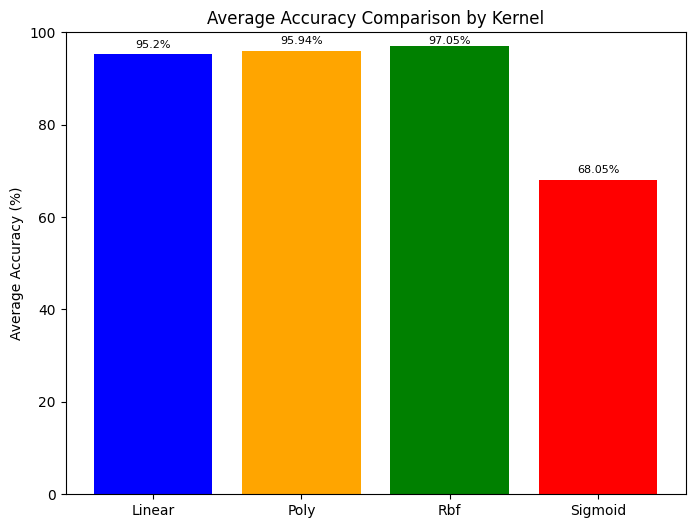

In [15]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    # Define Model SVM with specific kernel
    model = SVC(kernel=kernel, C=1000, gamma='scale')
    
    # Fit the model on training data
    model.fit(X_train, y_train_encoded)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy for each category
    categories = label_encoder.classes_
    accuracies = []
    for i, category in enumerate(categories):
        y_true_category = (y_test == category).astype(int)
        y_pred_category = (y_pred == i).astype(int)
        acc = accuracy_score(y_true_category, y_pred_category)
        accuracies.append(acc)
    
    # Calculate average accuracy across categories
    avg_acc = np.mean(accuracies) * 100
    
    # Store results
    results.append({'Kernel': kernel.capitalize(), 'Average Accuracy': avg_acc})

# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))

kernels_list = [result['Kernel'] for result in results]
avg_accuracies_list = [result['Average Accuracy'] for result in results]

bars = ax.bar(kernels_list, avg_accuracies_list, color=['blue', 'orange', 'green', 'red'])

# Set y-axis limit to 100
ax.set_ylim(0, 100)

# Add label values on top of the bars
for bar, avg_acc in zip(bars, avg_accuracies_list):
    yval = bar.get_height()
    label_text = f'{round(yval, 2)}%'
    
    # Check if label position will overlap with other labels
    if yval + 1 > 98:  # You may adjust this threshold based on your data range
        plt.text(bar.get_x() + bar.get_width()/2, yval, label_text, ha='center', va='bottom', fontsize=8)
    else:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, label_text, ha='center', va='bottom', fontsize=8)

ax.set_ylabel('Average Accuracy (%)')
ax.set_title('Average Accuracy Comparison by Kernel')
plt.show()

In [16]:
# Best Parameter
C = 1000
gamma = 'scale'

# Train best model
best_model = SVC(kernel='rbf', C=C, gamma=gamma)
best_model.fit(X_train, y_train_encoded)

SVC(C=1000)

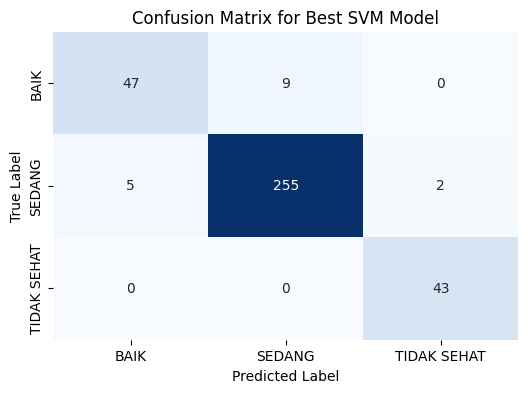

In [17]:
# Using the best model to make predictions on test data
y_pred = best_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Heatmap confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Best SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
# Save model
joblib.dump(best_model, 'best_svm_model.joblib')

['best_svm_model.joblib']